### LOAD MODEL


In [2]:
import torch
from matplotlib import pyplot as plt
import  numpy as np
import cv2 

c:\Users\krish\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\krish/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-23 Python-3.10.3 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Make Detections

In [3]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 972.1ms pre-process, 195.0ms inference, 11.0ms NMS per image at shape (1, 3, 384, 640)


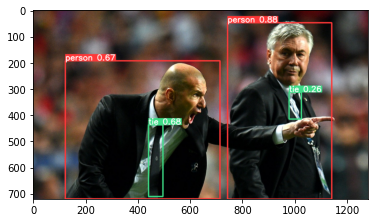

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()


In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [8]:
results.xyxy


[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

## Real Time Detections

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

##### xyxy:- the ouput from runnning results.xyxy is as follows: -xmin,-ymin,-xmax,ymax,confidence,-class

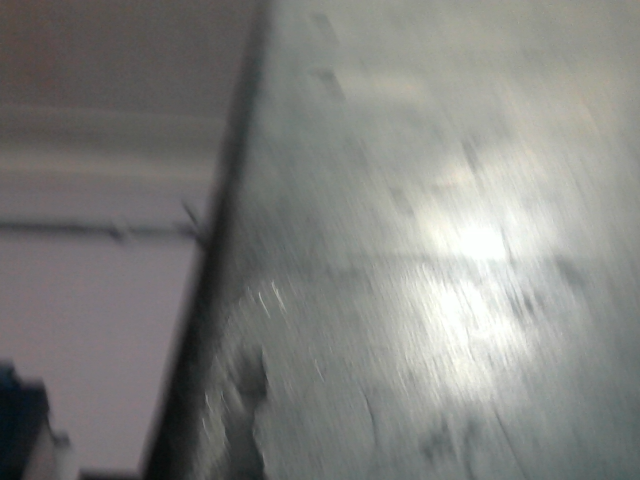

In [10]:
results.show()


In [11]:
results.render()

[array([[[ 90,  79,  77],
         [ 87,  76,  75],
         [ 85,  74,  73],
         ...,
         [142, 134, 124],
         [148, 136, 126],
         [149, 138, 127]],
 
        [[ 87,  75,  73],
         [ 85,  74,  72],
         [ 85,  74,  72],
         ...,
         [142, 137, 127],
         [146, 138, 128],
         [146, 138, 128]],
 
        [[ 89,  77,  74],
         [ 84,  73,  70],
         [ 83,  75,  70],
         ...,
         [138, 137, 127],
         [142, 139, 130],
         [141, 138, 128]],
 
        ...,
 
        [[  5,  17,  18],
         [  6,  17,  18],
         [  8,  17,  18],
         ...,
         [ 79,  93,  92],
         [ 79,  95,  93],
         [ 78,  93,  92]],
 
        [[  8,  18,  19],
         [  7,  17,  17],
         [  8,  17,  17],
         ...,
         [ 81,  94,  93],
         [ 80,  94,  93],
         [ 78,  92,  91]],
 
        [[  8,  17,  18],
         [  8,  17,  17],
         [  9,  18,  17],
         ...,
         [ 81,  94,  93],
  

In [12]:
np.array(results.render()).shape

(1, 480, 640, 3)

In [13]:
np.squeeze(results.render()).shape

(480, 640, 3)

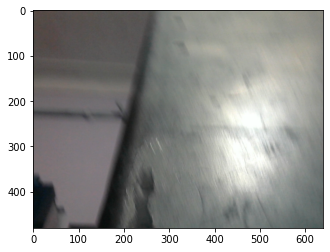

In [14]:
plt.imshow(np.squeeze(results.render()))

In [15]:
img =  'https://media.istockphoto.com/id/155287967/photo/cars-in-rush-hour-with-traffic-at-dawn.jpg?s=1024x1024&w=is&k=20&c=Z7M3X-2G4BpssWX_HcPwuNjF6kzSahA2_JbRTmjJqkY='

In [16]:
results = model(img)
results.print()

image 1/1: 683x1024 27 cars, 1 truck
Speed: 485.0ms pre-process, 132.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


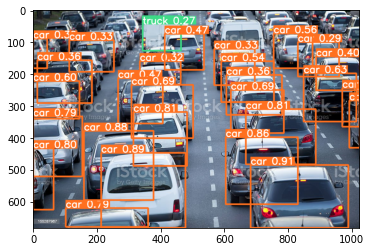

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()


In [18]:
results.render()

[array([[[ 47,  56,  51],
         [ 55,  64,  61],
         [ 70,  78,  81],
         ...,
         [ 96,  99, 104],
         [ 79,  82,  87],
         [ 72,  75,  80]],
 
        [[ 47,  56,  51],
         [ 54,  63,  60],
         [ 69,  77,  79],
         ...,
         [ 98, 101, 106],
         [ 78,  81,  86],
         [ 68,  71,  76]],
 
        [[ 47,  54,  47],
         [ 54,  60,  56],
         [ 66,  75,  74],
         ...,
         [100, 103, 108],
         [ 76,  79,  84],
         [ 60,  63,  68]],
 
        ...,
 
        [[ 49,  61,  77],
         [ 49,  61,  77],
         [ 50,  62,  78],
         ...,
         [ 52,  56,  68],
         [ 56,  60,  72],
         [ 53,  57,  69]],
 
        [[ 49,  61,  77],
         [ 49,  61,  77],
         [ 50,  62,  78],
         ...,
         [ 50,  54,  66],
         [ 54,  58,  70],
         [ 51,  55,  67]],
 
        [[ 49,  61,  77],
         [ 49,  61,  77],
         [ 50,  62,  78],
         ...,
         [ 49,  51,  64],
  

#### Real Time Detections

### 5. Train From scratch

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()

    #Make Detections
    results = model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllwindows()

In [19]:
import uuid    # unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data','images')  #/data/images
labels = ['awake','drowsy']
number_imgs = 20


In [ ]:
cap = cv2.Videocapture(0)
# loop through labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)

    #Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}.image number()'.format(label,img_num))

        ret,frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)




In [ ]:
for label in labels:
    print(label)

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label,img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)
    

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:

!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


In [20]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   1752768..2370a55  master       -> origin/master
   a417a9e..fe5d7f0  exp13        -> origin/exp13
 * [new branch]      exp13-nosoft -> origin/exp13-nosoft
 * [new branch]      exp13-soft   -> origin/exp13-soft
github:  YOLOv5 is out of date by 15 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-32-g357cde9 Python

In [30]:
torch.save(model, 'E:\Drowsiness\yolov5\yolov5\model_24.pt')

## Load MOdel

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r"E:\Drowsiness\yolov5\yolov5\runs\train\exp5\weights\best.pt", force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\krish/.cache\torch\hub\master.zip
YOLOv5  2022-12-24 Python-3.10.3 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img = r'E:\Drowsiness\yolov5\data\images\awake.c3ac18e2-7b0c-11ed-b89f-48e7daa71d2d.jpg'


In [12]:
results = model(img)

In [13]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 14.0ms pre-process, 185.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


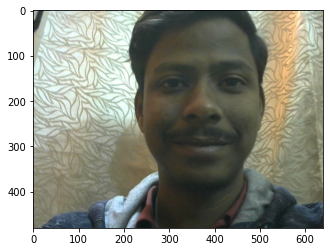

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'E:\Drowsiness\yolov5\yolov5\runs\train\exp4\weights\best.pt', force_reload=True)


cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\krish/.cache\torch\hub\master.zip
YOLOv5  2022-12-24 Python-3.10.3 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
